# 14891번 톱니 바퀴 - Silver 1

#### 알고리즘 분류: 구현 , 시뮬레이션
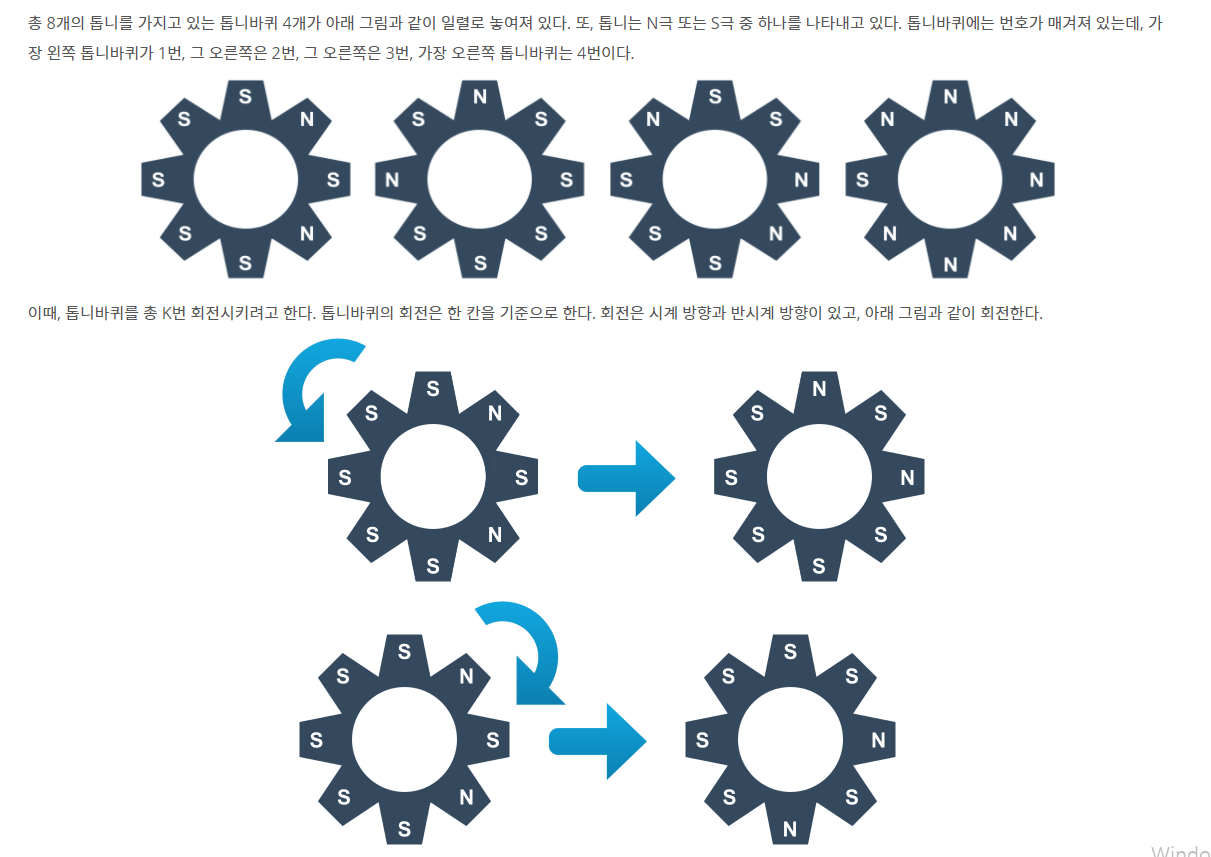
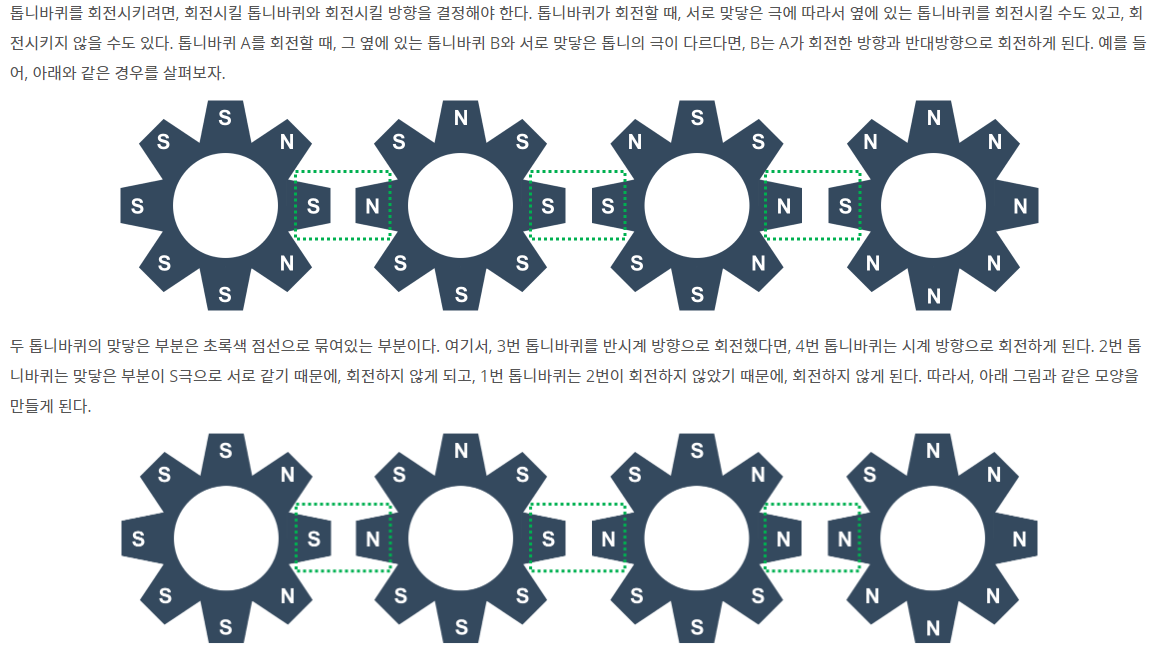
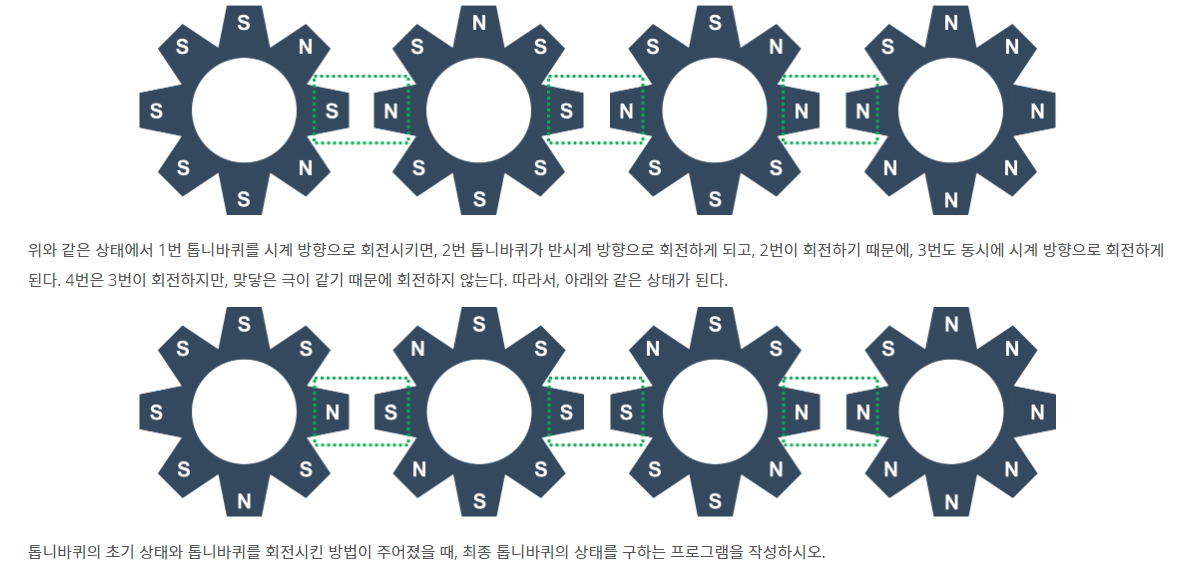

In [ ]:
wheels = [[0]  * 8 for _ in range(6)]
for i in range(1, 5):
    wheels[i] = [int(_) for _ in input()]

turn = int(input())
ops = [list(map(int, input().split())) for i in range(turn)]


def clockwise(wheel):
    p = wheel.pop(-1)
    return [p] + wheel


def counter_clockwise(wheel):
    p = wheel.pop(0)
    wheel.append(p)
    return wheel


left_idx, right_idx = 6,2

direction = [-1,0,1] # left left,right , right
def chain(idx, op,direction=None):
    if idx < 1 or idx > 4:
        return
    if op == 1:
        if wheels[idx - 1][right_idx] != wheels[idx][left_idx] and direction in [-1,0]:
            chain(idx - 1, op=-1,direction= -1 )
        if wheels[idx][right_idx] != wheels[idx + 1][left_idx] and direction in [1,0]:
            chain(idx + 1, op=-1,direction = 1)
        wheels[idx] = clockwise(wheels[idx])

    if op == -1:
        if wheels[idx - 1][right_idx] != wheels[idx][left_idx] and direction in [-1,0]:
            chain(idx - 1, op=1,direction=-1)
        if wheels[idx][right_idx] != wheels[idx + 1][left_idx] and direction in [1,0]:
            chain(idx + 1, op=1,direction= 1 )
        wheels[idx] = counter_clockwise(wheels[idx])


for idx, op in ops:
    chain(idx, op,0)
point = 0

for i in range(1,5):
    point += wheels[i][0] * 2**(i-1)
print(point)